In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sqlalchemy import create_engine
import json

#### Configuración de tema matplotlib

In [2]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
pd.set_option('display.max_columns', None)

#### Conexión a base de datos

In [3]:
with open('../config/lyft_conection.json', 'r') as file:
    credenciales_lyft = json.load(file)

engine = create_engine(f"mysql+pymysql://{credenciales_lyft['USERNAME']}:{credenciales_lyft['PASSWORD']}@{credenciales_lyft['SERVER']}/{credenciales_lyft['DATABASE']}")

### Consultas a base de datos

In [4]:
start_date = '2024-12-01 00:00:00'
end_date = '2025-12-31 23:59:59'

In [5]:
sql_transactions = f'''

SELECT 
    bikeAccountNumber,
    initializationDateTime,
    processingDateTime,
    completionDateTime,
    merchantTxId,
    amount,
    authorizationNumber,
    paymentType_id,
    paymentBusinessContext_id,
    paymentMode_id,
    paymentResult_id,
    paymentResultReason_id,
    paymentSourceType_id,
    bikeAccountType_id,
    creditCardType_id,
    creditCardId,
    cardBin,
    cardBinBrand,
    cardBinCountry,
    cardBinSubType,
    cardBinType,
    cardBinResult_id,
    reasonCode
FROM BikePaymentFact
WHERE 
	creationDateTime BETWEEN UNIX_TIMESTAMP(CONVERT_TZ("{start_date}", "America/Mexico_City", 'UTC'))*1000
    AND UNIX_TIMESTAMP(CONVERT_TZ("{end_date}", "America/Mexico_City", 'UTC'))*1000;

'''

df_sql_transactions = pd.read_sql(sql_transactions, engine)
df_sql_transactions.head(2)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238.0,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None
1,Z8JYWXGN,1.733033e+12,1733032801998,1733032801998,cyb_cnp0006637442,0,None,6,2003,6565653,1,241234,1,1,1.0,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914.0,VISA,MEX,CLASSIC,DEBIT,0.0,None


In [6]:
sql_PaymentTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentTypeDim

'''

df_sql_PaymentTypeDim = pd.read_sql(sql_PaymentTypeDim, engine)

df_sql_PaymentTypeDim.head()

,id,localizedValue0
0,0,Purchase
1,1,Pre-authorization
2,2,Completion
3,3,Refund
4,4,Refund (ind.)


In [7]:
sql_PaymentBusinessContextDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentBusinessContextDim

'''

df_sql_PaymentBusinessContextDim = pd.read_sql(sql_PaymentBusinessContextDim, engine)
df_sql_PaymentBusinessContextDim.head()

,id,localizedValue0
0,0,-
1,2000,Bike
2,2001,Migrated Payments
3,2002,Bike // Credit card validation
4,2003,Bike // Processing credit card validation pre-...


In [8]:
sql_PaymentModeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentModeDim

'''

df_sql_PaymentModeDim = pd.read_sql(sql_PaymentModeDim, engine)
df_sql_PaymentModeDim.head()

,id,localizedValue0
0,4798412,External
1,5646456,Cash
2,6565426,Electronic
3,6565653,Credit card
4,8308550,Mobile


In [9]:
sql_PaymentResultDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentResultDim

'''

df_sql_PaymentResultDim = pd.read_sql(sql_PaymentResultDim, engine)
df_sql_PaymentResultDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Accepted
2,2,Refused
3,3,Incomplete
4,4,Cancelled


In [10]:
sql_PaymentResultReasonDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentResultReasonDim

'''

df_sql_PaymentResultReasonDim = pd.read_sql(sql_PaymentResultReasonDim, engine)
df_sql_PaymentResultReasonDim.head()

,id,localizedValue0
0,23423,See response code
1,75445,Credit card expired
2,88923,View error code
3,104583,AVS mismatch
4,159489,Credit card deleted error


In [11]:
sql_PaymentSourceTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM PaymentSourceTypeDim

'''

df_sql_PaymentSourceTypeDim = pd.read_sql(sql_PaymentSourceTypeDim, engine)
df_sql_PaymentSourceTypeDim.head()

,id,localizedValue0
0,1,Backend payment source
1,2,Console payment source
2,3,PED
3,10,Test payment source
4,30,Bike web service payment source


In [12]:
sql_BikeAccountTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM BikeAccountTypeDim

'''

df_sql_BikeAccountTypeDim = pd.read_sql(sql_BikeAccountTypeDim, engine)
df_sql_BikeAccountTypeDim.head()

,id,localizedValue0
0,-128,Unknown
1,1,Member
2,2,Casual


In [13]:
sql_CreditCardTypeDim = f'''

SELECT 
    id,
    localizedValue0
FROM CreditCardTypeDim

'''

df_sql_CreditCardTypeDim = pd.read_sql(sql_CreditCardTypeDim, engine)
df_sql_CreditCardTypeDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Visa
2,2,Mastercard
3,3,Amex
4,4,Discover


In [14]:
sql_PaymentCreditCardBinResultDim = f'''

SELECT 
    id,
    localizedValue0
FROM CreditCardTypeDim

'''

df_sql_PaymentCreditCardBinResultDim = pd.read_sql(sql_PaymentCreditCardBinResultDim, engine)
df_sql_PaymentCreditCardBinResultDim.head()

,id,localizedValue0
0,0,Unknown
1,1,Visa
2,2,Mastercard
3,3,Amex
4,4,Discover


### Transformaciones

In [15]:
# convertir cardBin a entero sin decimales
df_sql_transactions['cardBin'] = pd.to_numeric(df_sql_transactions['cardBin'], errors='coerce').fillna(0).astype(int)
df_sql_transactions.head(2)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None
1,Z8JYWXGN,1.733033e+12,1733032801998,1733032801998,cyb_cnp0006637442,0,None,6,2003,6565653,1,241234,1,1,1.0,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,VISA,MEX,CLASSIC,DEBIT,0.0,None


In [16]:
# importar CSV
csv_file_path = '../data/Bin_ECOBICI.csv'
df_bines = pd.read_csv(csv_file_path, encoding='utf-8')
df_bines.head(1)

,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,202022,6,COMPLETO,110030,BAJIO,PRESTAMOS ABCD,ABCD,CRÃDITO,PRIVADA


In [17]:
# Agregar datos de df_bines a df_sql_transactions
df_merged = pd.merge(df_sql_transactions, df_bines, how='left', left_on='cardBin', right_on='BIN')
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,BX2Y9CGV,1.733033e+12,1733032801037,1733032801037,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD


In [18]:
# Formatos de fecha
df_merged['initializationDateTime'] = pd.to_datetime(df_merged['initializationDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged['processingDateTime'] = pd.to_datetime(df_merged['processingDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged['completionDateTime'] = pd.to_datetime(df_merged['completionDateTime'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Mexico_City')
df_merged.head(1)


,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD


#### PaymentTypeDim
Contains information pertaining to the type of transaction.

In [19]:
df_merged['tipo_pago'] = df_merged.merge(df_sql_PaymentTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal


#### PaymentBusinessContextDim
Contains information pertaining to the business context of the payment.

In [20]:
df_merged['contexto_negocio_pago'] = df_merged.merge(df_sql_PaymentBusinessContextDim[['id', 'localizedValue0']], how='left', left_on='paymentBusinessContext_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...


#### PaymentModeDim
Contains information pertaining to the payment means

In [21]:
df_merged['modo_pago'] = df_merged.merge(df_sql_PaymentModeDim[['id', 'localizedValue0']], how='left', left_on='paymentMode_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card


#### PaymentResultDim
Contains the result of a payment

In [22]:
df_merged['resultado_pago'] = df_merged.merge(df_sql_PaymentResultDim[['id', 'localizedValue0']], how='left', left_on='paymentResult_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted


#### PaymentResultReasonDim
Contains the result reason of a payment.

In [23]:
df_merged['razon_rechazo_pago'] = df_merged.merge(df_sql_PaymentResultReasonDim[['id', 'localizedValue0']], how='left', left_on='paymentResultReason_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None


#### PaymentSourceTypeDim
Contains the type of the payment source.

In [24]:
df_merged['fuente_pago'] = df_merged.merge(df_sql_PaymentSourceTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentSourceType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source


#### BikeAccountTypeDim
Contains information pertaining to types of bike accounts.

In [25]:
df_merged['tipo_de_ciclista'] = df_merged.merge(df_sql_BikeAccountTypeDim[['id', 'localizedValue0']], how='left', left_on='paymentSourceType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member


#### CreditCardTypeDim
Contains information pertaining to types of credit cards

In [26]:
df_merged['tipo_de_tarjeta'] = df_merged.merge(df_sql_CreditCardTypeDim[['id', 'localizedValue0']], how='left', left_on='creditCardType_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard


#### PaymentCreditCardBinResultDim
Contains the result information pertaining to the credit card BIN (bank identification number). The BIN corresponds to the first 6 digits
of the credit card number.

In [27]:
df_merged['resultado_tarjeta_credito'] = df_merged.merge(df_sql_PaymentCreditCardBinResultDim[['id', 'localizedValue0']], how='left', left_on='cardBinResult_id', right_on='id')['localizedValue0']
df_merged.head(1)

,bikeAccountNumber,initializationDateTime,processingDateTime,completionDateTime,merchantTxId,amount,authorizationNumber,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,creditCardId,cardBin,cardBinBrand,cardBinCountry,cardBinSubType,cardBinType,cardBinResult_id,reasonCode,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [28]:
# Renombrar columnas
df_merged.rename(columns={
    'bikeAccountNumber': 'numero_cuenta_bici',
    'initializationDateTime': 'fecha_hora_inicializacion',
    'processingDateTime': 'fecha_hora_procesamiento',
    'completionDateTime': 'fecha_hora_completacion',
    'merchantTxId': 'id_transaccion_comerciante',
    'amount': 'monto',
    'authorizationNumber': 'numero_autorizacion',
    'creditCardId': 'id_tarjeta_credito',
    'cardBin': 'bin_tarjeta',
    'cardBinBrand': 'marca_bin',
    'cardBinCountry': 'pais_bin',
    'cardBinSubType': 'subtipo_bin',
    'cardBinType': 'tipo_tarjeta',
    'cardBinResult_id': 'id_resultado_bin',
    'reasonCode': 'codigo_razon'
}, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,paymentType_id,paymentBusinessContext_id,paymentMode_id,paymentResult_id,paymentResultReason_id,paymentSourceType_id,bikeAccountType_id,creditCardType_id,id_tarjeta_credito,bin_tarjeta,marca_bin,pais_bin,subtipo_bin,tipo_tarjeta,id_resultado_bin,codigo_razon,BIN,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,NATURALEZA,MARCA,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,6,2003,6565653,1,241234,1,1,2.0,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MASTERCARD,MEX,STANDARD,DEBIT,0.0,None,551238.0,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,DÃBITO,MASTER CARD,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [29]:
# Eliminar columnas innecesarias
columns_to_drop = [
    'paymentType_id',
    'paymentBusinessContext_id',
    'paymentMode_id',
    'paymentResult_id',
    'paymentResultReason_id',
    'paymentSourceType_id',
    'bikeAccountType_id',
    'creditCardType_id',
    'marca_bin',
    'BIN',
    'marca_bin',
    'NATURALEZA',
    'id_resultado_bin',
    'MARCA'
]
df_merged.drop(columns=columns_to_drop, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,LONGITUD,RANGO,ID INSTITUCIÃN,INSTITUCIÃN,PRODUCTO,NOMBRE CORTO,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [30]:
# renombrar columnas
df_merged.rename(columns={
    'LONGITUD': 'longitud_bin',
    'RANGO': 'rango_bin',
    'INSTITUCIÃN': 'institucion_bin',
    'ID INSTITUCIÃN': 'id_institucion_bin',
    'PRODUCTO': 'producto_bin',
    'NOMBRE CORTO': 'nombre_corto_bin'
}, inplace=True)
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown


In [31]:
# Crear columna pago_exitoso donde codigo_razon es vacio es pago exitoso
df_merged['pago_exitoso'] = np.where(df_merged['codigo_razon'].isnull() | (df_merged['codigo_razon'] == ''), 'Exitoso', 'Fallido')
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso


In [32]:
# Extraer semana de pago de fecha_hora_inicializacion
# Extraer año de pago de fecha_hora_inicializacion
df_merged['numero_semana'] = df_merged['fecha_hora_inicializacion'].dt.isocalendar().week
df_merged['numero_ano'] = df_merged['fecha_hora_inicializacion'].dt.isocalendar().year

df_merged['numero_semana_ano'] = df_merged['numero_semana'].astype(str) + '-' + df_merged['numero_ano'].astype(str)
df_merged.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024


In [33]:
df_merged['numero_semana_ano'].unique()

array(['48-2024', '49-2024', '<NA>-<NA>', '50-2024', '51-2024', '52-2024',
       '1-2025', '2-2025', '3-2025', '4-2025', '5-2025', '6-2025',
       '7-2025', '8-2025', '9-2025', '10-2025', '11-2025', '12-2025',
       '13-2025', '14-2025', '15-2025', '16-2025', '17-2025', '18-2025',
       '19-2025', '20-2025', '21-2025', '22-2025', '23-2025', '24-2025',
       '25-2025', '26-2025', '27-2025', '28-2025', '29-2025', '30-2025',
       '31-2025', '32-2025', '33-2025', '34-2025', '35-2025', '36-2025',
       '37-2025', '38-2025', '39-2025', '40-2025', '41-2025', '42-2025',
       '43-2025', '44-2025', '45-2025', '46-2025', '47-2025'],
      dtype=object)

In [34]:
# filtrar donde numero_semana_ano es 
df_filtered_not_na = df_merged[df_merged['numero_semana_ano'] != '<NA>-<NA>']
df_filtered_not_na

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
1,Z8JYWXGN,2024-12-01 00:00:01.096000-06:00,2024-12-01 00:00:01.998000-06:00,2024-12-01 00:00:01.998000-06:00,cyb_cnp0006637442,0,None,e9bc54d2-d8d7-4b6b-a821-6246c8035e43,418914,MEX,CLASSIC,DEBIT,None,6.0,COMPLETO,110072.0,BANORTE,IXE/VISA/DEBITO,IXE DEBITO,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
2,BX2Y9CGV,2024-12-01 00:00:02.064000-06:00,2024-12-01 00:00:02.864000-06:00,2024-12-01 00:00:02.864000-06:00,cyb_cnp0006637443,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
3,BX2Y9CGV,2024-12-01 00:00:02.942000-06:00,2024-12-01 00:00:03.817000-06:00,2024-12-01 00:00:03.817000-06:00,cyb_cnp0006637444,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024
4,8YEV4RHB,2024-12-01 00:00:03.893000-06:00,2024-12-01 00:00:04.650000-06:00,2024-12-01 00:00:04.650000-06:00,cyb_cnp0006637445,0,None,fce27dc2-d518-413a-8610-a89b5f497017,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Visa,Unknown,Exitoso,48,2024,48-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552795,DF5QQSY7,2025-11-18 20:22:55.628000-06:00,2025-11-18 20:22:55.628000-06:00,2025-11-18 20:22:55.628000-06:00,None,1279900,None,02e4feff-5c63-4516-a77b-c8f841edf250,481516,MEX,None,CREDIT,None,6.0,COMPLETO,210012.0,BBVA,TJ DIGITAL DEB AFFLUENT,TJ DIG AFT,Purchase,Bike // Member subscription purchase,Credit card,Refused,Suspected fraud (Sift Science),Mobile,NaN,Visa,Unknown,Exitoso,47,2025,47-2025
1552796,T8SSVWTX,2025-11-18 20:22:57.207000-06:00,2025-11-18 20:22:58.774000-06:00,2025-11-18 20:22:58.774000-06:00,cyb_cnp0008053146,5660000,None,dfb9ec0e-3f52-4978-bbba-f6cb8c57ba75,531722,GBR,CORPORATE,CREDIT,None,8.0,FRACCIÃN,316112.0,TECNOLOGIAS DIFIERE,MCS-MASTERCARD STANDARD,PLATA,Purchase,Bike // Member subscription purchase,Credit card,Accepted,None,Mobile,NaN,Mastercard,Unknown,Exitoso,47,2025,47-2025
1552797,T8SSVWTX,2025-11-18 20:22:57.207000-06:00,2025-11-18 20:22:58.774000-06:00,2025-11-18 20:22:58.774000-06:00,cyb_cnp0008053146,5660000,None,dfb9ec0e-3f52-4978-bbba-f6cb8c57ba75,531722,GBR,CORPORATE,CREDIT,None,8.0,FRACCIÃN,316112.0,TECNOLOGIAS DIFIERE,MCS MASTERCARD STANDARD,DIF TECH,Purchase,Bike // Member subscription purchase,Credit card,Accepted,None,M

### Visualizaciones

#### Pérdidas estimadas: Gráfico de barras apiladas (rechazos × valor $)

In [35]:
df_merged.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano
0,BX2Y9CGV,2024-12-01 00:00:00.179000-06:00,2024-12-01 00:00:01.037000-06:00,2024-12-01 00:00:01.037000-06:00,cyb_cnp0006637441,0,None,43a9a69f-1338-42bb-b0c3-78be26747ea3,551238,MEX,STANDARD,DEBIT,None,6.0,COMPLETO,110127.0,AZTECA,PAQUETE FAMILIAR AZTECA,-,Pre-authorization reversal,Bike // Processing credit card validation pre-...,Credit card,Accepted,None,Backend payment source,Member,Mastercard,Unknown,Exitoso,48,2024,48-2024


In [40]:
error_type_sorted_fallido = df_merged[df_merged['pago_exitoso'] == 'Fallido']
error_type_sorted_fallido.head(1)

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano
12,284976,2024-12-01 00:00:09.357000-06:00,2024-12-01 00:00:10.388000-06:00,2024-12-01 00:00:10.388000-06:00,cyb_cnp0006637453,5450000,None,b2c645d3-99f4-40e2-8337-2cc93bcff2dd,549138,MEX,WORLD CARD,CREDIT,PROCESSOR_DECLINED,6.0,COMPLETO,210002.0,BANAMEX,PLATINUM BANAMEX,PLATINUM,Purchase,Bike // Member auto-renew membership purchase,Credit card,Refused,None,Autorenew upon membership expiry,NaN,Mastercard,Unknown,Fallido,48,2024,48-2024


In [41]:
# columna monto_real
error_type_sorted_fallido['monto_real'] = error_type_sorted_fallido['monto'] / 10000
error_type_sorted_fallido.head(1)


C:\Users\victor.briones\AppData\Local\Temp\ipykernel_15564\3041453144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_type_sorted_fallido['monto_real'] = error_type_sorted_fallido['monto'] / 10000


,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano,monto_real
12,284976,2024-12-01 00:00:09.357000-06:00,2024-12-01 00:00:10.388000-06:00,2024-12-01 00:00:10.388000-06:00,cyb_cnp0006637453,5450000,None,b2c645d3-99f4-40e2-8337-2cc93bcff2dd,549138,MEX,WORLD CARD,CREDIT,PROCESSOR_DECLINED,6.0,COMPLETO,210002.0,BANAMEX,PLATINUM BANAMEX,PLATINUM,Purchase,Bike // Member auto-renew membership purchase,Credit card,Refused,None,Autorenew upon membership expiry,NaN,Mastercard,Unknown,Fallido,48,2024,48-2024,545.0


In [42]:
from collections import defaultdict

def etiquetar_intentos(df):
    # Ordenar por usuario y fecha
    df = df.sort_values(['numero_cuenta_bici', 'fecha_hora_inicializacion'])
    
    # Calcular número de intento por usuario
    df['intento_numero'] = df.groupby('numero_cuenta_bici').cumcount() + 1
    
    # Crear etiqueta descriptiva
    def crear_etiqueta(numero):
        if numero == 1:
            return 1
        elif numero == 2:
            return 2
        elif numero == 3:
            return 3
        else:
            return numero
    
    df['etiqueta_intento'] = df['intento_numero'].apply(crear_etiqueta)
    
    return df

df_etiquetado = etiquetar_intentos(error_type_sorted_fallido)

In [43]:
df_etiquetado.head()

,numero_cuenta_bici,fecha_hora_inicializacion,fecha_hora_procesamiento,fecha_hora_completacion,id_transaccion_comerciante,monto,numero_autorizacion,id_tarjeta_credito,bin_tarjeta,pais_bin,subtipo_bin,tipo_tarjeta,codigo_razon,longitud_bin,rango_bin,id_institucion_bin,institucion_bin,producto_bin,nombre_corto_bin,tipo_pago,contexto_negocio_pago,modo_pago,resultado_pago,razon_rechazo_pago,fuente_pago,tipo_de_ciclista,tipo_de_tarjeta,resultado_tarjeta_credito,pago_exitoso,numero_semana,numero_ano,numero_semana_ano,monto_real,intento_numero,etiqueta_intento
925034,10017,2025-07-08 23:00:04.941000-06:00,2025-07-08 23:00:06.274000-06:00,2025-07-08 23:00:06.274000-06:00,cyb_cnp0007482290,5660000,None,cad6dc07-dae8-4dac-be3a-68f63093404f,520694,MEX,PLATINUM,DEBIT,UNAUTHORIZED_CARD,6.0,COMPLETO,210002.0,BANAMEX,CUENTA PRIORITY BANAMEX,PRIORITY,Purchase,Bike // Member auto-renew membership purchase,Credit card,Refused,None,Autorenew upon membership expiry,NaN,Mastercard,Unknown,Fallido,28,2025,28-2025,566.0,1,1
925729,10017,2025-07-09 11:00:05.314000-06:00,2025-07-09 11:00:06.501000-06:00,2025-07-09 11:00:06.501000-06:00,cyb_cnp0007482880,5660000,None,731f7d20-ad2c-424a-a113-9e556a7c8292,520694,MEX,PLATINUM,DEBIT,PROCESSOR_DECLINED,6.0,COMPLETO,210002.0,BANAMEX,CUENTA PRIORITY BANAMEX,PRIORITY,Purchase,Bike // Member auto-renew membership purchase,Credit card,Refused,None,Autorenew upon membership expiry,NaN,Mastercard,Unknown,Fallido,28,2025,28-2025,566.0,2,2
927691,10017,2025-07-10 10:00:04.921000-06:00,2025-07-10 10:00:05.975000-06:00,2025-07-10 10:00:05.975000-06:00,cyb_cnp0007484731,5660000,None,731f7d20-ad2c-424a-a113-9e556a7c8292,520694,MEX,PLATINUM,DEBIT,PROCESSOR_DECLINED,6.0,COMPLETO,210002.0,BANAMEX,CUENTA PRIORITY BANAMEX,PRIORITY,Purchase,Bike // Member auto-renew membership purchase,Credit card,Refused,None,Autorenew upon membership expiry,NaN,Mastercard,Unknown,Fallido,28,2025,28-2025,566.0,3,3
928153,10017,2025-07-10 13:26:36.200000-06:00,2025-07-10 13:26:37.354000-06:00,2025-07-10 13:26:37.354000-06:00,cyb_cnp0007485177,5660000,None,731f7d20-ad2c-424a-a113-9e556a7c8292,520694,MEX,PLATINUM,DEBIT,PROCESSOR_DECLINED,6.0,COMPLETO,210002.0,BANAMEX,CUENTA PRIORITY BANAMEX,PRIORITY,Purchase,Bike // Member subscription purchase,Credit card,Refused,None,Console payment source,Casual,Mastercard,Unknown,Fallido,28,2025,28-2025,566.0,4,4
792499,100313,2025-06-02 16:00:05.903000-06:00,2025-06-02 16:00:07.051000-06:00,2025-06-02 16:00:07.051000-06:00,cyb_cnp0007361435,5660000,None,201b11d9-ffdb-4b87-98eb-5565ce75dd64,557910,MEX,None,DEBIT,UNAUTHORIZED_CARD,6.0,COMPLETO,110014.0,SANTANDER,CHEQUE ELECTRONICO DEBITO,-,Purchase,Bike // Member auto-renew membership purchase,Credit card,Refused,None,Autorenew upon membership expiry,NaN,Mastercard,Unknown,Fallido,23,2025,23-2025,566.0,1,1


In [44]:
# filtrar por exitosos
df_exitosos = df_etiquetado[df_etiquetado['pago_exitoso'] == 'Exitoso']
df_fallidos = df_etiquetado[df_etiquetado['pago_exitoso'] == 'Fallido']

In [52]:
# agrupar por codigo_razon y sumar monto_real
perdidas_por_codigo = df_fallidos.groupby('codigo_razon')['monto_real'].sum().reset_index().sort_values(by='monto_real', ascending=False)
perdidas_por_codigo.head()

,codigo_razon,monto_real
7,INSUFFICIENT_FUND,54056495.04
10,PROCESSOR_DECLINED,27745547.93
13,UNAUTHORIZED_CARD,23692494.99
0,ALLOWABLE_PIN_RETRIES_EXCEEDED,15019700.00
3,DECISION_PROFILE_REJECT,8824610.77


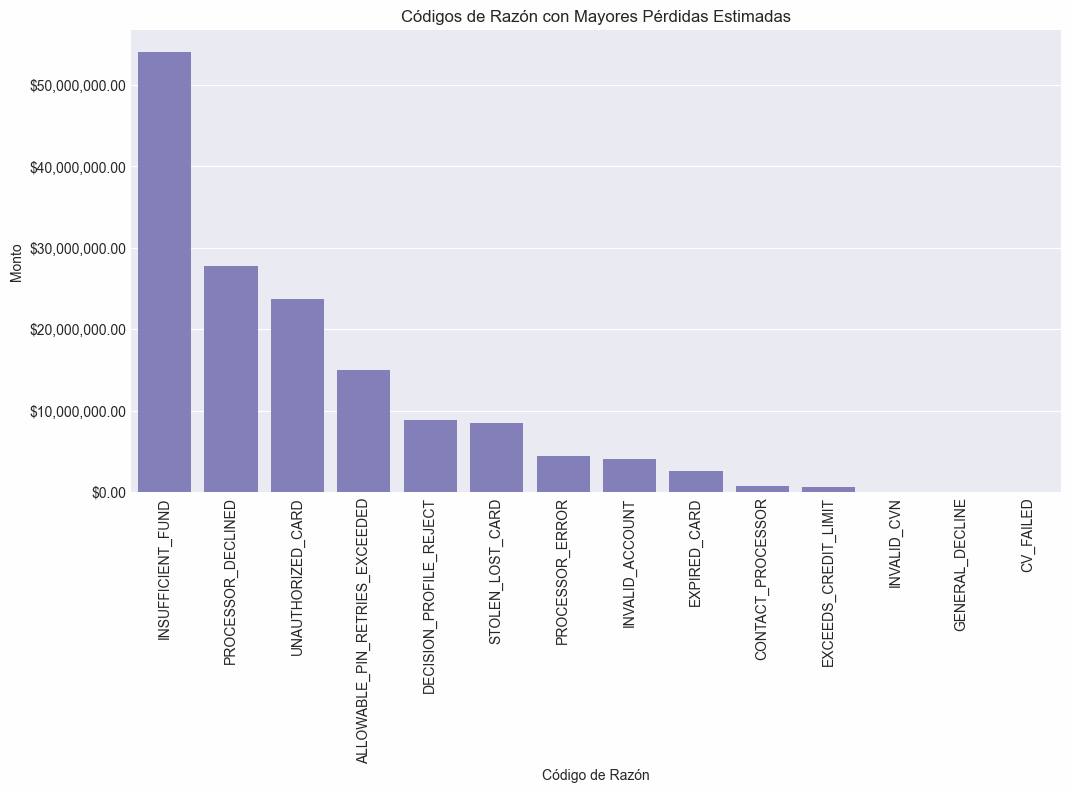

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(data=perdidas_por_codigo, x='codigo_razon', y='monto_real')
plt.title('Códigos de Razón con Mayores Pérdidas Estimadas')
# etiquetas de y en formato $1,000,000.00
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${x:,.2f}'))
plt.xlabel('Código de Razón')
plt.ylabel('Monto')
plt.xticks(rotation=90)
plt.show()

In [79]:
perdidas_por_codigo.to_csv('../data/perdidas_por_codigo.csv', index=False)

In [73]:
df_fallidos_filtrado = df_fallidos[df_fallidos['etiqueta_intento'] <= 8]

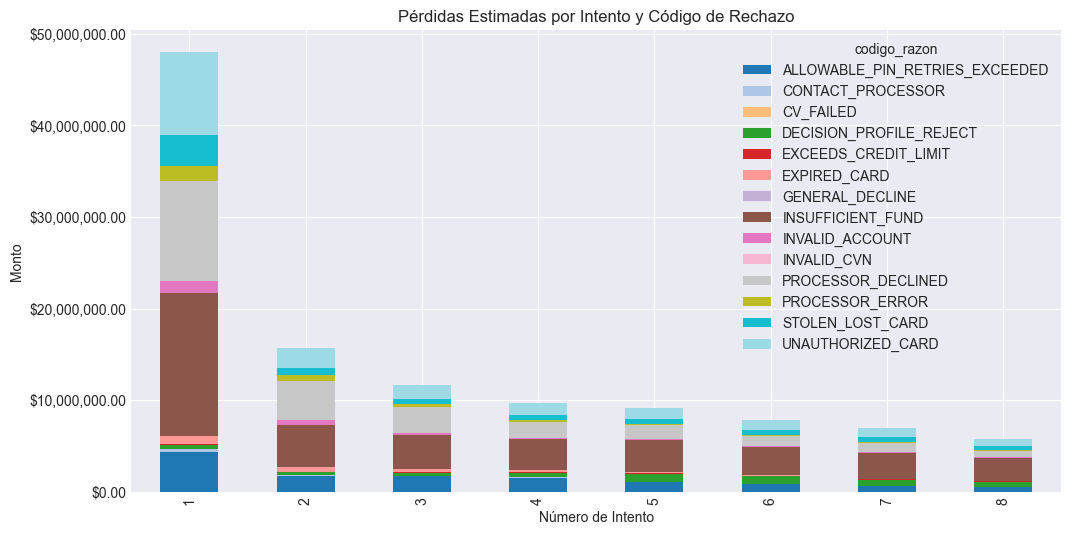

In [78]:
# grafica de area de perdidas por intentos y razon_codigo
perdidas_por_intento_razon = df_fallidos_filtrado.groupby(['etiqueta_intento', 'codigo_razon'])['monto_real'].sum().reset_index()
perdidas_por_intento_razon_pivot = perdidas_por_intento_razon.pivot(index='etiqueta_intento', columns='codigo_razon', values='monto_real').fillna(0)
perdidas_por_intento_razon_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${x:,.2f}'))
plt.title('Pérdidas Estimadas por Intento y Código de Rechazo')
plt.xlabel('Número de Intento')
plt.ylabel('Monto')
plt.show()

#### 